In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ["JAVA_HOME"] = "/opt/homebrew/opt/openjdk@17"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

In [2]:
data_path = 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/16 21:43:22 WARN Utils: Your hostname, Nemesis0MacBook-Pro.local, resolves to a loopback address: 127.0.0.1; using 192.168.10.49 instead (on interface en0)
25/11/16 21:43:22 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/16 21:43:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


DataFrame[PdId: string, IncidntNum: string, Incident Code: string, Category: string, Descript: string, DayOfWeek: string, Date: string, Time: string, PdDistrict: string, Resolution: string, Address: string, X: string, Y: string, location: string, data_loaded_at: string, SF Find Neighborhoods 2 2: string, Current Police Districts 2 2: string, Current Supervisor Districts 2 2: string, Analysis Neighborhoods 2 2: string, DELETE - Fire Prevention Districts 2 2: string, DELETE - Police Districts 2 2: string, DELETE - Supervisor Districts 2 2: string, DELETE - Zip Codes 2 2: string, DELETE - Neighborhoods 2 2: string, DELETE - 2017 Fix It Zones 2 2: string, Civic Center Harm Reduction Project Boundary 2 2: string, Fix It Zones as of 2017-11-06  2 2: string, DELETE - HSOC Zones 2 2: string, Fix It Zones as of 2018-02-07 2 2: string, CBD, BID and GBD Boundaries as of 2017 2 2: string, Areas of Vulnerability, 2016 2 2: string, Central Market/Tenderloin Boundary 2 2: string, Central Market/Tende

25/11/16 21:43:25 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [4]:
pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,16020415607021,160204156,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Thursday,03/03/2016,19:30,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13011910904134,130119109,4134,ASSAULT,BATTERY,Sunday,02/10/2013,18:09,MISSION,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,52.0
2,6102672004134,61026720,4134,ASSAULT,BATTERY,Monday,09/25/2006,22:15,NORTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,97.0
3,11049313327195,110493133,27195,TRESPASS,TRESPASSING,Sunday,06/19/2011,13:06,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,63.0
4,8074906804134,80749068,4134,ASSAULT,BATTERY,Friday,05/23/2008,12:10,NORTHERN,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071731,5076179106374,50761791,6374,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Saturday,07/09/2005,22:30,NORTHERN,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,17.0
2071732,9101956365015,91019563,65015,OTHER OFFENSES,TRAFFIC VIOLATION,Thursday,10/01/2009,23:52,BAYVIEW,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,86.0
2071733,10088749904012,100887499,4012,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,Friday,09/24/2010,11:45,SOUTHERN,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2071734,5006491526200,50064915,26200,OTHER OFFENSES,MISCELLANEOUS STATE FELONY,Sunday,01/02/2005,10:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


#### Q1: 
Write a Spark program that counts the number of crimes for different category.

In [5]:
# sql way
spark_sql_q1 = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
spark_sql_q1.show()

+--------------------+------+
|            category| Count|
+--------------------+------+
|       LARCENY/THEFT|477975|
|      OTHER OFFENSES|301874|
|        NON-CRIMINAL|179139|
|             ASSAULT|167042|
|       VEHICLE THEFT|126228|
|       DRUG/NARCOTIC|117821|
|           VANDALISM|114718|
|            WARRANTS| 99821|
|            BURGLARY| 91067|
|      SUSPICIOUS OCC| 79087|
|             ROBBERY| 54467|
|      MISSING PERSON| 44268|
|               FRAUD| 41348|
|FORGERY/COUNTERFE...| 22995|
|     SECONDARY CODES| 22378|
|         WEAPON LAWS| 21004|
|            TRESPASS| 19194|
|        PROSTITUTION| 16501|
|     STOLEN PROPERTY| 11450|
|  DISORDERLY CONDUCT|  9932|
+--------------------+------+
only showing top 20 rows


In [6]:
# df way
spark_df_q1 = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
spark_df_q1.show()

+--------------------+------+
|            category| count|
+--------------------+------+
|       LARCENY/THEFT|477975|
|      OTHER OFFENSES|301874|
|        NON-CRIMINAL|179139|
|             ASSAULT|167042|
|       VEHICLE THEFT|126228|
|       DRUG/NARCOTIC|117821|
|           VANDALISM|114718|
|            WARRANTS| 99821|
|            BURGLARY| 91067|
|      SUSPICIOUS OCC| 79087|
|             ROBBERY| 54467|
|      MISSING PERSON| 44268|
|               FRAUD| 41348|
|FORGERY/COUNTERFE...| 22995|
|     SECONDARY CODES| 22378|
|         WEAPON LAWS| 21004|
|            TRESPASS| 19194|
|        PROSTITUTION| 16501|
|     STOLEN PROPERTY| 11450|
|  DISORDERLY CONDUCT|  9932|
+--------------------+------+
only showing top 20 rows


/var/folders/5y/xtj06zmd2qgg8gc6kg8lvnn80000gn/T/ipykernel_77941/3332180253.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x = 'category', y = 'count', palette= 'BuGn_r',data = spark_df_q1_plot )
/var/folders/5y/xtj06zmd2qgg8gc6kg8lvnn80000gn/T/ipykernel_77941/3332180253.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'LARCENY/THEFT'),
 Text(1, 0, 'OTHER OFFENSES'),
 Text(2, 0, 'NON-CRIMINAL'),
 Text(3, 0, 'ASSAULT'),
 Text(4, 0, 'VEHICLE THEFT'),
 Text(5, 0, 'DRUG/NARCOTIC'),
 Text(6, 0, 'VANDALISM'),
 Text(7, 0, 'WARRANTS'),
 Text(8, 0, 'BURGLARY'),
 Text(9, 0, 'SUSPICIOUS OCC'),
 Text(10, 0, 'ROBBERY'),
 Text(11, 0, 'MISSING PERSON'),
 Text(12, 0, 'FRAUD'),
 Text(13, 0, 'FORGERY/COUNTERFEITING'),
 Text(14, 0, 'SECONDARY CODES'),
 Text(15, 0, 'WEAPON LAWS'),
 Text(16, 0, 'TRESPASS'),
 Text(17, 0, 'PROSTITUTION'),
 Text(18, 0, 'STOLEN PROPERTY'),
 Text(19, 0, 'DISORDERLY CONDUCT'),
 Text(20, 0, 'DRUNKENNESS'),
 Text(21, 0, 'SEX OFFENSES, FORCIBLE'),
 Text(22, 0, 'RECOVERED VEHICLE'),
 Text(23, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(24, 0, 'KIDNAPPING'),
 Text(25, 0, 'ARSON'),
 Text(26, 0, 'EMBEZZLEMENT'),
 Text(27, 0, 'LIQUOR LAWS'),
 Text(28, 0, 'LOITERING'),
 Text(29, 0, 'SUICIDE'),
 Text(30, 0, 'BAD CHECKS'),
 Text(31, 0, 'BRIBERY'),
 Text(32, 0, 'EXTORTION'),
 Text(33, 0, 'GAMBLIN

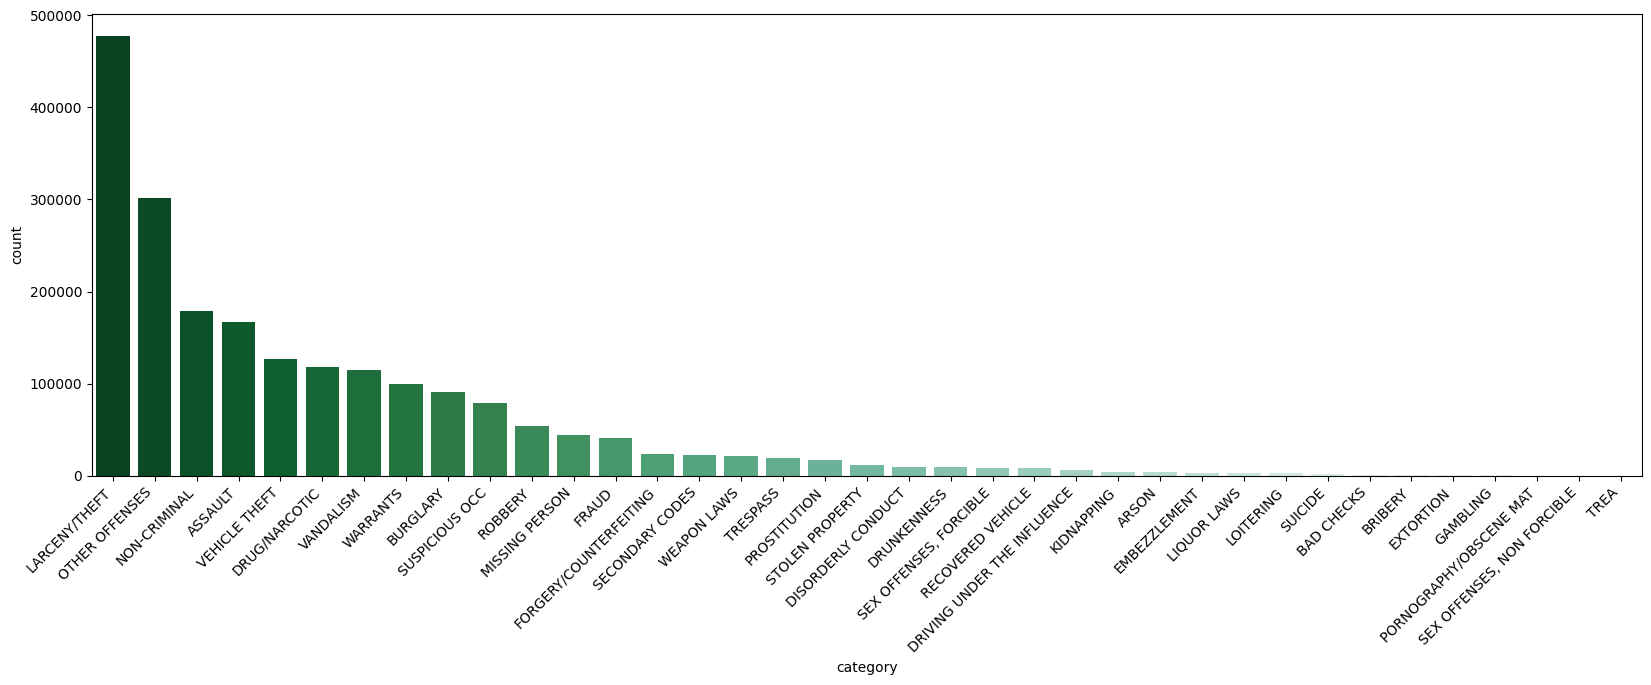

In [7]:
# Visualize Result
fig_dims = (20,6)
fig = plt.subplots(figsize=fig_dims)
spark_df_q1_plot = spark_df_q1.toPandas()
chart = sns.barplot(x = 'category', y = 'count', palette= 'BuGn_r',data = spark_df_q1_plot )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Q1_Insight: According to the number of crimes, we can classify crime category into three groups based on the above-mentioned graphs and tables: high crime rate, medium crime rate, and low crime rate.

#### Q2: 
Counts the number of crimes for different district, and visualize your results.

In [8]:
# sql way
spark_sql_q2 = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")
spark_sql_q2.show()

+----------+------+
|PdDistrict| Count|
+----------+------+
|  SOUTHERN|378453|
|   MISSION|279744|
|  NORTHERN|260013|
|   CENTRAL|216646|
|   BAYVIEW|201989|
|TENDERLOIN|180934|
| INGLESIDE|176557|
|   TARAVAL|150970|
|      PARK|116296|
|  RICHMOND|110133|
|        NA|     1|
+----------+------+



In [9]:
# df way
spark_df_q2 = df_opt1.groupBy('PdDistrict').count().orderBy('Count', ascending=False)
spark_df_q2.show()

+----------+------+
|PdDistrict| count|
+----------+------+
|  SOUTHERN|378453|
|   MISSION|279744|
|  NORTHERN|260013|
|   CENTRAL|216646|
|   BAYVIEW|201989|
|TENDERLOIN|180934|
| INGLESIDE|176557|
|   TARAVAL|150970|
|      PARK|116296|
|  RICHMOND|110133|
|        NA|     1|
+----------+------+



/var/folders/5y/xtj06zmd2qgg8gc6kg8lvnn80000gn/T/ipykernel_77941/499966272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x = 'PdDistrict', y = 'count', palette= 'BuGn_r',data = spark_df_q2_plot )
/var/folders/5y/xtj06zmd2qgg8gc6kg8lvnn80000gn/T/ipykernel_77941/499966272.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'SOUTHERN'),
 Text(1, 0, 'MISSION'),
 Text(2, 0, 'NORTHERN'),
 Text(3, 0, 'CENTRAL'),
 Text(4, 0, 'BAYVIEW'),
 Text(5, 0, 'TENDERLOIN'),
 Text(6, 0, 'INGLESIDE'),
 Text(7, 0, 'TARAVAL'),
 Text(8, 0, 'PARK'),
 Text(9, 0, 'RICHMOND'),
 Text(10, 0, 'NA')]

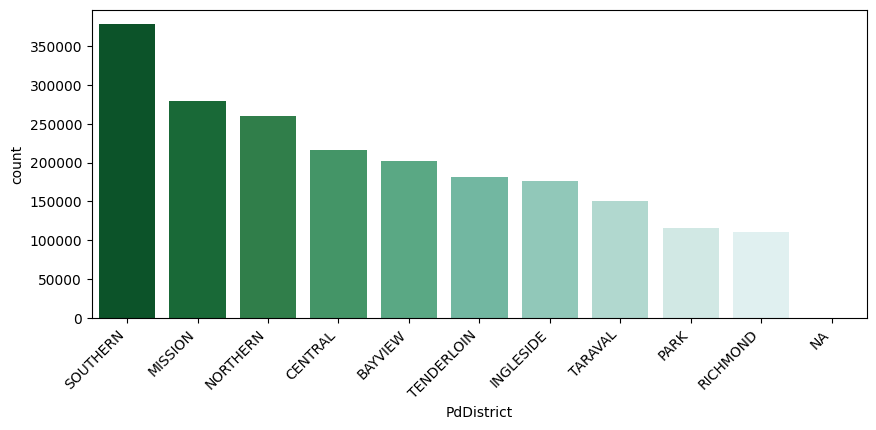

In [10]:
# Visualize Result
fig_dims = (10,4)
fig = plt.subplots(figsize=fig_dims)
spark_df_q2_plot = spark_df_q2.toPandas()
chart = sns.barplot(x = 'PdDistrict', y = 'count', palette= 'BuGn_r',data = spark_df_q2_plot )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Q3: 
Count the number of crimes each "Sunday" at "SF downtown". <br>

In [11]:
df_opt2 = df_opt1[['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location']]
display(df_opt2)
df_opt2.createOrReplaceTempView("sf_crime")

DataFrame[IncidntNum: string, Category: string, Descript: string, DayOfWeek: string, Date: string, Time: string, PdDistrict: string, Resolution: string, Address: string, X: string, Y: string, Location: string]

In [12]:
from pyspark.sql.functions import hour, date_format, to_date, month, year
# add new columns to convert Date to date format
df_new = df_opt2.withColumn("IncidentDate",to_date(df_opt2.Date, "MM/dd/yyyy")) 
# extract month and year from incident date
df_new = df_new.withColumn('Month',month(df_new['IncidentDate']))
df_new = df_new.withColumn('Year', year(df_new['IncidentDate']))
display(df_new.take(5))

[Row(IncidntNum='160204156', Category='VEHICLE THEFT', Descript='STOLEN AUTOMOBILE', DayOfWeek='Thursday', Date='03/03/2016', Time='19:30', PdDistrict='TARAVAL', Resolution='NONE', Address='100 Block of BEPLER ST', X='-122.46354501681947', Y='37.70796836450968', Location='POINT (-122.463545017 37.707968365)', IncidentDate=datetime.date(2016, 3, 3), Month=3, Year=2016),
 Row(IncidntNum='130119109', Category='ASSAULT', Descript='BATTERY', DayOfWeek='Sunday', Date='02/10/2013', Time='18:09', PdDistrict='MISSION', Resolution='NONE', Address='900 Block of DOLORES ST', X='-122.425236707185', Y='37.7542221906773', Location='POINT (-122.425236707 37.754222191)', IncidentDate=datetime.date(2013, 2, 10), Month=2, Year=2013),
 Row(IncidntNum='061026720', Category='ASSAULT', Descript='BATTERY', DayOfWeek='Monday', Date='09/25/2006', Time='22:15', PdDistrict='NORTHERN', Resolution='NONE', Address='400 Block of FULTON ST', X='-122.425839480353', Y='37.7784863750012', Location='POINT (-122.42583948 3

In [13]:
# df way
sf_downtown = (df_new.X > -122.4313) & (df_new.X < -122.4213) & (df_new.Y < 37.7740) & (df_new.Y > 37.7540 )
spark_df_q3 = df_new.filter((df_new.DayOfWeek == "Sunday") & (sf_downtown)).groupby('IncidentDate','DayOfWeek').count().orderBy('IncidentDate')
spark_df_q3.show()

+------------+---------+-----+
|IncidentDate|DayOfWeek|count|
+------------+---------+-----+
|  2003-01-05|   Sunday|   13|
|  2003-01-12|   Sunday|   20|
|  2003-01-19|   Sunday|   15|
|  2003-01-26|   Sunday|   13|
|  2003-02-02|   Sunday|   13|
|  2003-02-09|   Sunday|   22|
|  2003-02-16|   Sunday|   12|
|  2003-02-23|   Sunday|   14|
|  2003-03-02|   Sunday|   15|
|  2003-03-09|   Sunday|    8|
|  2003-03-16|   Sunday|   16|
|  2003-03-23|   Sunday|    9|
|  2003-03-30|   Sunday|   20|
|  2003-04-06|   Sunday|    7|
|  2003-04-13|   Sunday|   13|
|  2003-04-20|   Sunday|   13|
|  2003-04-27|   Sunday|    5|
|  2003-05-04|   Sunday|    9|
|  2003-05-11|   Sunday|    5|
|  2003-05-18|   Sunday|   16|
+------------+---------+-----+
only showing top 20 rows


In [14]:
# sql way
spark_sql_q3 = spark.sql("""
SELECT Date, DayOfWeek, COUNT(*) AS Count 
FROM sf_crime 
WHERE DayOfWeek = 'Sunday' 
  AND X > -122.4313 AND X < -122.4213 
  AND Y > 37.7540 AND Y < 37.7740 
GROUP BY Date, DayOfWeek 
ORDER BY Date
""")

In [15]:
spark_df_q3.show()

+------------+---------+-----+
|IncidentDate|DayOfWeek|count|
+------------+---------+-----+
|  2003-01-05|   Sunday|   13|
|  2003-01-12|   Sunday|   20|
|  2003-01-19|   Sunday|   15|
|  2003-01-26|   Sunday|   13|
|  2003-02-02|   Sunday|   13|
|  2003-02-09|   Sunday|   22|
|  2003-02-16|   Sunday|   12|
|  2003-02-23|   Sunday|   14|
|  2003-03-02|   Sunday|   15|
|  2003-03-09|   Sunday|    8|
|  2003-03-16|   Sunday|   16|
|  2003-03-23|   Sunday|    9|
|  2003-03-30|   Sunday|   20|
|  2003-04-06|   Sunday|    7|
|  2003-04-13|   Sunday|   13|
|  2003-04-20|   Sunday|   13|
|  2003-04-27|   Sunday|    5|
|  2003-05-04|   Sunday|    9|
|  2003-05-11|   Sunday|    5|
|  2003-05-18|   Sunday|   16|
+------------+---------+-----+
only showing top 20 rows


#### Q4: 
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

##### Q4_Spark Dataframe Way

In [16]:
years = [2015, 2016, 2017, 2018]
df_years = df_new[df_new.Year.isin(years)]
display(df_years.take(5))

[Row(IncidntNum='160204156', Category='VEHICLE THEFT', Descript='STOLEN AUTOMOBILE', DayOfWeek='Thursday', Date='03/03/2016', Time='19:30', PdDistrict='TARAVAL', Resolution='NONE', Address='100 Block of BEPLER ST', X='-122.46354501681947', Y='37.70796836450968', Location='POINT (-122.463545017 37.707968365)', IncidentDate=datetime.date(2016, 3, 3), Month=3, Year=2016),
 Row(IncidntNum='150216321', Category='ASSAULT', Descript='BATTERY', DayOfWeek='Tuesday', Date='03/10/2015', Time='00:01', PdDistrict='SOUTHERN', Resolution='NONE', Address='800 Block of BRYANT ST', X='-122.403404791479', Y='37.775420706711', Location='POINT (-122.403404791 37.775420707)', IncidentDate=datetime.date(2015, 3, 10), Month=3, Year=2015),
 Row(IncidntNum='150204865', Category='MISSING PERSON', Descript='MISSING ADULT', DayOfWeek='Friday', Date='03/06/2015', Time='20:00', PdDistrict='SOUTHERN', Resolution='NONE', Address='300 Block of BERRY ST', X='-122.396759086061', Y='37.7731734400875', Location='POINT (-12

In [17]:
spark_df_q4 = df_years.groupby(['Year', 'Month']).count().orderBy('Year','Month')
spark_df_q4.show()

+----+-----+-----+
|Year|Month|count|
+----+-----+-----+
|2015|    1|12781|
|2015|    2|11504|
|2015|    3|13037|
|2015|    4|12125|
|2015|    5|12893|
|2015|    6|12490|
|2015|    7|12598|
|2015|    8|12875|
|2015|    9|12042|
|2015|   10|12282|
|2015|   11|11299|
|2015|   12|10749|
|2016|    1|12154|
|2016|    2|11394|
|2016|    3|11547|
|2016|    4|11486|
|2016|    5|11916|
|2016|    6|11305|
|2016|    7|11436|
|2016|    8|11747|
+----+-----+-----+
only showing top 20 rows


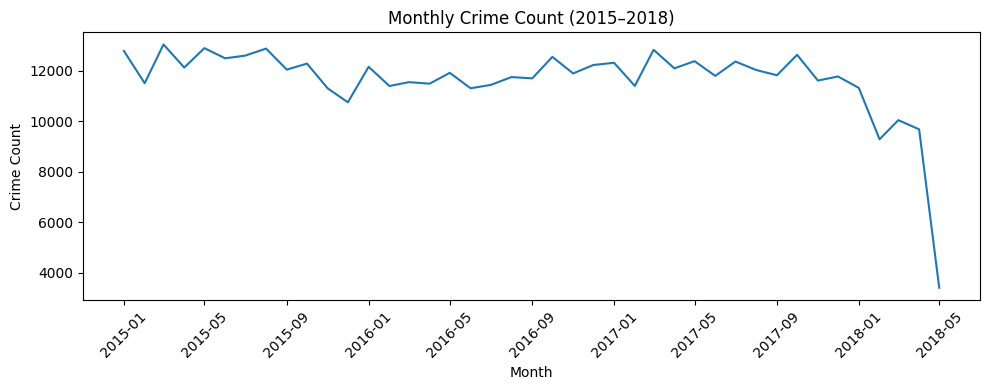

In [18]:
pdf_q4 = spark_df_q4.toPandas()
pdf_q4['Date'] = pd.to_datetime(pdf_q4['Year'].astype(str) + '-' + pdf_q4['Month'].astype(str))

plt.figure(figsize=(10, 4))
sns.lineplot(data=pdf_q4, x='Date', y='count')
plt.title("Monthly Crime Count (2015–2018)")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Q4_Business Impact: 
* It is very obvious from the above figure that the crime rate from 2015 to 2017 is very high, especially the theft crime, and there has been a downward trend in 2018, especially in May.
* The crime rate has been so high since 2015, it may be because of the 47th Act signed by the governor in the California referendum in 2014, which led to a large number of theft and robbery crimes.
* Through online research, the reason for the decline in crime rate since 2018 may be that the San Francisco Police Department has increased uniformed police patrols, hence violence and theft activities have been greatly reduced. In addition, the San Francisco Police Department stepped up its crackdown on the drug trade, which is also one of the reasons for the decline in crime rate.

##### Q4_Spark_SQL_Way

In [19]:
df_opt2.createOrReplaceTempView('sf_crime')

In [20]:
spark_sql_q4 = spark.sql("""
                       SELECT SUBSTRING(Date,1,2) AS Month, SUBSTRING(Date,7,4) AS Year, COUNT(*) AS Count
                       FROM sf_crime
                       GROUP BY Year, Month
                       HAVING Year in (2015, 2016, 2017, 2018) 
                       ORDER BY Year, Month
                       """)
spark_sql_q4.show()

+-----+----+-----+
|Month|Year|Count|
+-----+----+-----+
|   01|2015|12781|
|   02|2015|11504|
|   03|2015|13037|
|   04|2015|12125|
|   05|2015|12893|
|   06|2015|12490|
|   07|2015|12598|
|   08|2015|12875|
|   09|2015|12042|
|   10|2015|12282|
|   11|2015|11299|
|   12|2015|10749|
|   01|2016|12154|
|   02|2016|11394|
|   03|2016|11547|
|   04|2016|11486|
|   05|2016|11916|
|   06|2016|11305|
|   07|2016|11436|
|   08|2016|11747|
+-----+----+-----+
only showing top 20 rows


#### Q5: 
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [21]:
from pyspark.sql.functions import to_timestamp
# add new columns to convert Time to hour format
df_new1 = df_new.withColumn('IncidentTime', to_timestamp(df_new['Time'],'HH:mm')) 
# extract hour from incident time
df_new1 = df_new1.withColumn('Hour',hour(df_new1['IncidentTime']))
display(df_new1.take(5))

[Row(IncidntNum='160204156', Category='VEHICLE THEFT', Descript='STOLEN AUTOMOBILE', DayOfWeek='Thursday', Date='03/03/2016', Time='19:30', PdDistrict='TARAVAL', Resolution='NONE', Address='100 Block of BEPLER ST', X='-122.46354501681947', Y='37.70796836450968', Location='POINT (-122.463545017 37.707968365)', IncidentDate=datetime.date(2016, 3, 3), Month=3, Year=2016, IncidentTime=datetime.datetime(1970, 1, 1, 19, 30), Hour=19),
 Row(IncidntNum='130119109', Category='ASSAULT', Descript='BATTERY', DayOfWeek='Sunday', Date='02/10/2013', Time='18:09', PdDistrict='MISSION', Resolution='NONE', Address='900 Block of DOLORES ST', X='-122.425236707185', Y='37.7542221906773', Location='POINT (-122.425236707 37.754222191)', IncidentDate=datetime.date(2013, 2, 10), Month=2, Year=2013, IncidentTime=datetime.datetime(1970, 1, 1, 18, 9), Hour=18),
 Row(IncidntNum='061026720', Category='ASSAULT', Descript='BATTERY', DayOfWeek='Monday', Date='09/25/2006', Time='22:15', PdDistrict='NORTHERN', Resolutio

In [22]:
dates = ['12/15/2015','12/15/2016','12/15/2017']
df_days = df_new1[df_new1.Date.isin(dates)]
spark_df_q5_1 = df_days.groupby('Hour','Date').count().orderBy('Date','Hour')
spark_df_q5_1.show()

+----+----------+-----+
|Hour|      Date|count|
+----+----------+-----+
|   0|12/15/2015|   15|
|   1|12/15/2015|    6|
|   2|12/15/2015|    5|
|   3|12/15/2015|    4|
|   4|12/15/2015|    9|
|   5|12/15/2015|    3|
|   6|12/15/2015|    4|
|   7|12/15/2015|    7|
|   8|12/15/2015|   12|
|   9|12/15/2015|   10|
|  10|12/15/2015|   25|
|  11|12/15/2015|   15|
|  12|12/15/2015|   34|
|  13|12/15/2015|   13|
|  14|12/15/2015|   26|
|  15|12/15/2015|   14|
|  16|12/15/2015|   28|
|  17|12/15/2015|   17|
|  18|12/15/2015|   17|
|  19|12/15/2015|   26|
+----+----------+-----+
only showing top 20 rows


#### Q5_Travel Suggestion
It can be clearly seen from the above figure that there are two peak periods of crime, 12 o'clock and 18 o'clock. This time period is the time for tourists to eat and rest. So remind visitors not to relax their vigilance while resting.

#### Q6: 
(1) Step1: Find out the top-3 danger disrict<br>
(2) Step2: Find out the crime event w.r.t category and time (hour) from the result of step 1<br>
(3) give your advice to distribute the police based on your analysis results.

##### Step1: Find out the top-3 danger district

In [23]:
#df way
spark_df_q6_s1 = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False)
spark_df_q6_s1.show(20, False)

+----------+------+
|PdDistrict|count |
+----------+------+
|SOUTHERN  |378453|
|MISSION   |279744|
|NORTHERN  |260013|
|CENTRAL   |216646|
|BAYVIEW   |201989|
|TENDERLOIN|180934|
|INGLESIDE |176557|
|TARAVAL   |150970|
|PARK      |116296|
|RICHMOND  |110133|
|NA        |1     |
+----------+------+



In [24]:
top3_danger = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False).head(3)
top3_danger_district = [top3_danger[i][0] for i in range(3)]
top3_danger_district

['SOUTHERN', 'MISSION', 'NORTHERN']

In [25]:
#sql way
spark_sql_q6_s1 = spark.sql( """
                             SELECT PdDistrict, COUNT(*) as Count
                             FROM sf_crime
                             GROUP BY 1
                             ORDER BY 2 DESC
                             LIMIT 3 
                             """ )
spark_sql_q6_s1.show()

+----------+------+
|PdDistrict| Count|
+----------+------+
|  SOUTHERN|378453|
|   MISSION|279744|
|  NORTHERN|260013|
+----------+------+



##### Step2: Find out the crime event w.r.t category and time (hour) from the result of step 1

In [26]:
# df way
spark_df_q6_s2 = df_new1.filter(df_new1.PdDistrict.isin('SOUTHERN', 'MISSION', 'NORTHERN')).groupby('Category','Hour').count().orderBy('Category','Hour')

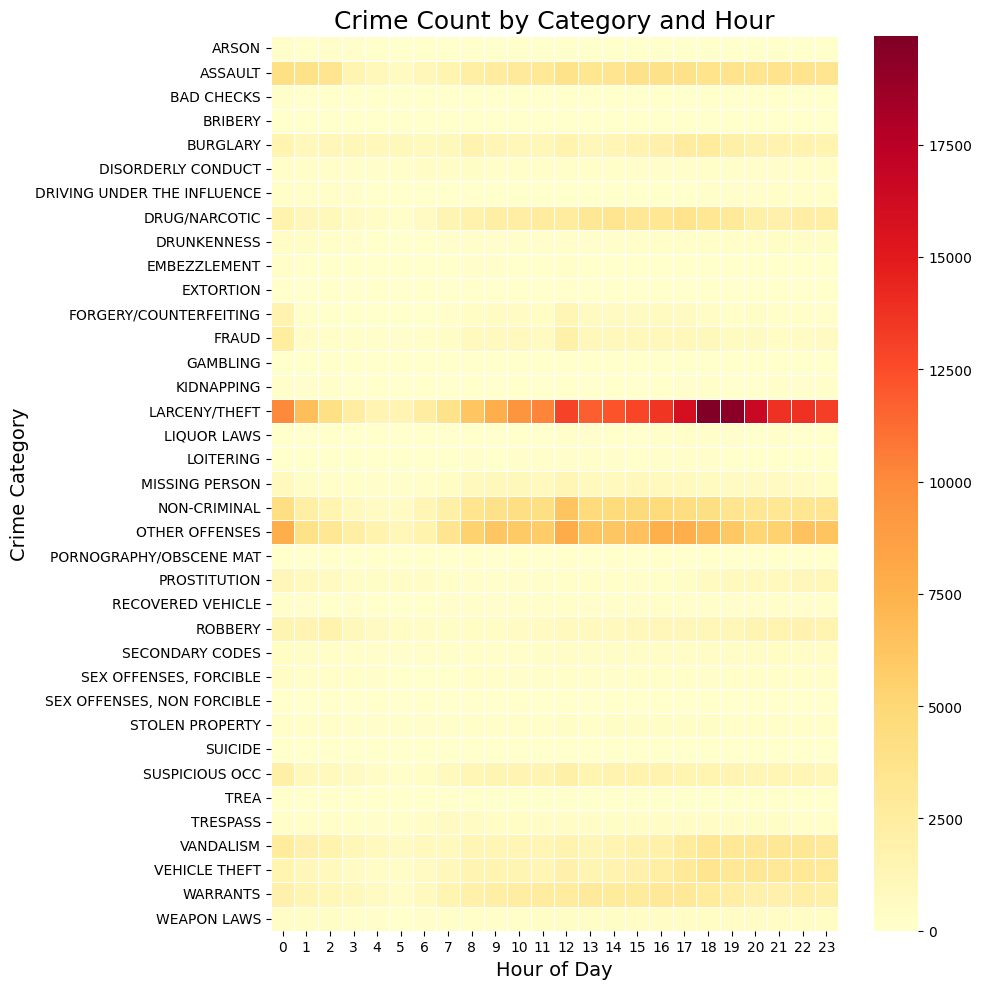

In [27]:
pdf = spark_df_q6_s2.toPandas()
pivot_df = pdf.pivot(index='Category', columns='Hour', values='count').fillna(0)

plt.figure(figsize=(10, 10))
sns.heatmap(pivot_df, cmap="YlOrRd", linewidths=0.5, annot=False)

plt.title("Crime Count by Category and Hour", fontsize=18)
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Crime Category", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Q6_Advice
* According to step1, the three most dangerous districts are SOUTHERN, MISSION and NORTHERN.
* We can see from the picture above that among the top three dangerous streets, the crime rate around 5 am is the lowest, and the high incidence of crime rate is around 12pm and 18pm, especially pay attention to theft, so I recommend to increase police patrol during that periods.

#### Q7:
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [28]:
spark.sql("""
    SELECT DISTINCT resolution AS resolve 
    FROM sf_crime
""").show()

+--------------------+
|             resolve|
+--------------------+
|EXCEPTIONAL CLEAR...|
|      ARREST, BOOKED|
|PROSECUTED FOR LE...|
|             LOCATED|
|           UNFOUNDED|
|DISTRICT ATTORNEY...|
|   PSYCHOPATHIC CASE|
|COMPLAINANT REFUS...|
|       ARREST, CITED|
|PROSECUTED BY OUT...|
|                NONE|
|      NOT PROSECUTED|
+--------------------+



In [29]:
from pyspark.sql.functions import udf
import pyspark.sql.functions as f
from pyspark.sql.window import Window
resolution_func = udf (lambda x: x != 'NONE')
spark_df_q7 = df_new.withColumn('IsResolution', resolution_func(f.col('Resolution')))
spark_df_q7 = spark_df_q7.groupBy('category', 'Resolution', 'IsResolution').count().withColumnRenamed('count', 'resolved').orderBy('category')
spark_df_q7 = spark_df_q7.withColumn('total', f.sum('resolved').over(Window.partitionBy('category')))\
             .withColumn('percentage%', f.col('resolved')*100/f.col('total'))\
             .filter(spark_df_q7.IsResolution == True).orderBy('percentage%', ascending=False)

In [30]:
spark_df_q7.show()

+--------------------+--------------+------------+--------+------+------------------+
|            category|    Resolution|IsResolution|resolved| total|       percentage%|
+--------------------+--------------+------------+--------+------+------------------+
|            WARRANTS|ARREST, BOOKED|        true|   93092| 99821| 93.25893349094879|
|DRIVING UNDER THE...|ARREST, BOOKED|        true|    4941|  5652| 87.42038216560509|
|     STOLEN PROPERTY|ARREST, BOOKED|        true|    9693| 11450| 84.65502183406113|
|       DRUG/NARCOTIC|ARREST, BOOKED|        true|   97926|117821| 83.11421563218781|
|         DRUNKENNESS|ARREST, BOOKED|        true|    7471|  9760| 76.54713114754098|
|         LIQUOR LAWS|ARREST, BOOKED|        true|    1839|  2840| 64.75352112676056|
|         WEAPON LAWS|ARREST, BOOKED|        true|   13334| 21004| 63.48314606741573|
|           LOITERING| ARREST, CITED|        true|    1432|  2402| 59.61698584512906|
|        PROSTITUTION| ARREST, CITED|        true|    

In [31]:
import pyspark.sql.functions as f
from pyspark.sql.window import Window
resolution_func = udf (lambda x: x != 'NONE')
spark_df_q7 = df_new.withColumn('IsResolution', resolution_func(f.col('Resolution')))
spark_df_q7 = spark_df_q7.groupBy('category', 'IsResolution').count().withColumnRenamed('count', 'resolved').orderBy('category')
spark_df_q7 = spark_df_q7.withColumn('total', f.sum('resolved').over(Window.partitionBy('category')))\
             .withColumn('percentage%', f.col('resolved')*100/f.col('total'))\
             .filter(spark_df_q7.IsResolution == True).orderBy('percentage%', ascending=False)

In [32]:
spark_df_q7.show()

+--------------------+------------+--------+------+------------------+
|            category|IsResolution|resolved| total|       percentage%|
+--------------------+------------+--------+------+------------------+
|        PROSTITUTION|        true|   15651| 16501| 94.84879704260348|
|            WARRANTS|        true|   94339| 99821| 94.50816962362629|
|DRIVING UNDER THE...|        true|    5335|  5652| 94.39136588818117|
|       DRUG/NARCOTIC|        true|  107565|117821|  91.2952699433887|
|         LIQUOR LAWS|        true|    2527|  2840| 88.97887323943662|
|           LOITERING|        true|    2103|  2402| 87.55203996669442|
|     STOLEN PROPERTY|        true|   10011| 11450| 87.43231441048034|
|         DRUNKENNESS|        true|    8035|  9760| 82.32581967213115|
|      OTHER OFFENSES|        true|  215059|301874| 71.24131260062146|
|         WEAPON LAWS|        true|   14934| 21004|  71.1007427156732|
|            TRESPASS|        true|   12907| 19194| 67.24497238720433|
|     

##### Q7_Summary
* The top four categories of crimes resolved are PROSTITUTION, WARRANTS, DRIVING UNDER THE INFLUENCE, DRUG/NARCOTIC.
* The categories which less than 10% of crimes resolved are RECOVERED VEHICLE, VEHICLE THEFT, and LARCENY/THEFT.
* Can increase the police force against theft crimes.


#### Conclusion
Use four sentences to summary your work. Like what you have done, how to do it, what the techinical steps, what is your business impact. More details are appreciated. You can think about this a report for your manager. Then, you need to use this experience to prove that you have strong background on big data analysis.
Point 1: what is your story ? and why you do this work ?
Point 2: how can you do it ? keywords: Spark, Spark SQL, Dataframe, Data clean, Data visulization, Data size, clustering, OLAP,
Point 3: what do you learn from the data ? keywords: crime, trend, advising, conclusion, runtime